# Ejemplos de Representación gráfica.

## Importacion de librerias

In [1]:
import pandas as pd
import sys
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
# from pandas.tools.plotting import radviz

%matplotlib inline


## Lectura del archivo JSON

In [2]:
rawData = pd.read_json('data/log-course2.json')
rawData.head()

,accept_language,agent,context,event,event_source,event_type,host,ip,name,page,referer,session,time,username
0,"es-ES,es;q=0.9",Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"{'course_user_tags': {}, 'user_id': '', 'org_i...","{""POST"": {}, ""GET"": {}}",server,/courses/course-v1:UTPL+SARH5+2019_1/about,opencampus.utpl.edu.ec,77.111.247.82,NaN,None,,NaN,2019-04-01T04:28:26.189835+00:00,
1,"es-ES,es;q=0.9",Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"{'course_user_tags': {}, 'user_id': '', 'org_i...","{""POST"": {}, ""GET"": {}}",server,/courses/course-v1:UTPL+SARH5+2019_1/,opencampus.utpl.edu.ec,77.111.247.82,NaN,None,,NaN,2019-04-01T04:28:27.321273+00:00,
2,"es-ES,es;q=0.8,en-US;q=0.5,en;q=0.3",Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:6...,"{'course_user_tags': {}, 'user_id': '', 'org_i...","{""POST"": {}, ""GET"": {}}",server,/courses/course-v1:UTPL+SARH5+2019_1/about,opencampus.utpl.edu.ec,157.100.56.84,NaN,None,,NaN,2019-04-01T04:36:10.029097+00:00,
3,"es-ES,es;q=0.8,en-US;q=0.5,en;q=0.3",Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:6...,"{'user_id': '', 'org_id': '', 'course_id': '',...","{""POST"": {}, ""GET"": {}}",server,/i18n.js,opencampus.utpl.edu.ec,157.100.56.84,NaN,None,http://opencampus.utpl.edu.ec/courses/course-v...,NaN,2019-04-01T04:36:10.637890+00:00,
4,"es-ES,es;q=0.8,en-US;q=0.5,en;q=0.3",Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:6...,"{'user_id': '', 'org_id': '', 'course_id': '',...","{""POST"": {""course_id"": [""course-v1:UTPL+SARH5+...",server,/change_enrollment,opencampus.utpl.edu.ec,157.100.56.84,NaN,None,http://opencampus.utpl.edu.ec/courses/course-v...,NaN,2019-04-01T04:38:47.135982+00:00,


In [3]:
rawData['agent'].sample(10).unique()

array(['Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.131 Safari/537.36',
       'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/73.0.3683.103 Safari/537.36',
       'Mozilla/5.0 (Linux; Android 7.0; G1031A) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/73.0.3683.90 Safari/537.36',
       'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.131 Safari/537.36',
       'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/73.0.3683.103 Safari/537.36',
       'Mozilla/5.0 (iPhone; CPU iPhone OS 12_1_4 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/12.0 Mobile/15E148 Safari/604.1',
       'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/73.0.3683.86 Safari/537.36'],
      dtype=object)

## Creamos una copia de los datos
Creamos una copia de las columnas `agent` e `ip`.

In [4]:
copyOfData = rawData[['agent', 'ip']]
copyOfData.head()

,agent,ip
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,77.111.247.82
1,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,77.111.247.82
2,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:6...,157.100.56.84
3,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:6...,157.100.56.84
4,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:6...,157.100.56.84


## Creamos nuevos datos a partir de los existentes

Se definen funciones para obtener el OS desde el cual se lanzo el evento.

In [5]:
def findOS(text, so):
    return text.find(so) != -1

def extractDevice(agentRaw:str):
    agentRaw = agentRaw.lower()
    if findOS(agentRaw, 'windows'):
        return 'Windows'
    elif findOS(agentRaw, 'macintosh'):
        return 'Macintosh'
    elif findOS(agentRaw, 'iphone'):
        return 'iPhone'
    elif findOS(agentRaw, 'android'):
        return 'Android'
    elif findOS(agentRaw, 'linux'):
        return 'Linux'
    else:
        return 'Otros'

Ejecutamos la funcion `extractDevice` para cada registro del `DataFrame`.

In [6]:
copyOfData['agent'] = copyOfData['agent'].map(lambda x: extractDevice(x))
copyOfData = copyOfData.sort_values(['agent'])
copyOfData.head()

c:\users\hp-pc\docume~1\6tociclo\gp2.2\taller~1\manejo~1\env~1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,agent,ip
28248,Android,66.249.88.164
44973,Android,66.249.88.164
44974,Android,66.249.88.167
44975,Android,66.249.88.164
44976,Android,66.249.88.167


## Obtenemos los datos que usaremos para graficar
Mediante el metodo `groupby` del `DataFrame`, agrupamos los registros por su campo `agent` y usamos el metodo `count` para obtener el numero de veces que se lanzan eventos desde un OS concreto.

Renombramos la columna *ip* a *frequency*.

In [7]:
deviceData = copyOfData[['agent','ip']].groupby(['agent'], as_index=False).count()
deviceData.rename(columns={'ip': 'frequency'}, inplace=True)
deviceData

,agent,frequency
0,Android,5673
1,Linux,492
2,Macintosh,2124
3,Otros,281
4,Windows,42206
5,iPhone,485


## Extraemos los registros en diferentes grupos

In [8]:
phoneData = deviceData.loc[[0, 5]]
phoneData

,agent,frequency
0,Android,5673
5,iPhone,485


In [9]:
computerData = deviceData.loc[[1, 2, 4]]
computerData

,agent,frequency
1,Linux,492
2,Macintosh,2124
4,Windows,42206


In [10]:
otherData = deviceData.loc[3].values
otherData

array(['Otros', 281], dtype=object)

## Listas de colores en hexadecimal

In [11]:
colors = ['#4E5340', '#697268', '#95A3A4', '#B7D1DA', '#E2E8DD', '#CBB8A9']
colors2 = ['#F4D06F', '#FF8811', '#9DD9D2', '#392F5A', '#E2E8DD', '#5C9EAD']

# Graficando los datos
## Grafico de Barras Horizontales

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000., 35000.,
        40000., 45000.]), <a list of 10 Text xticklabel objects>)

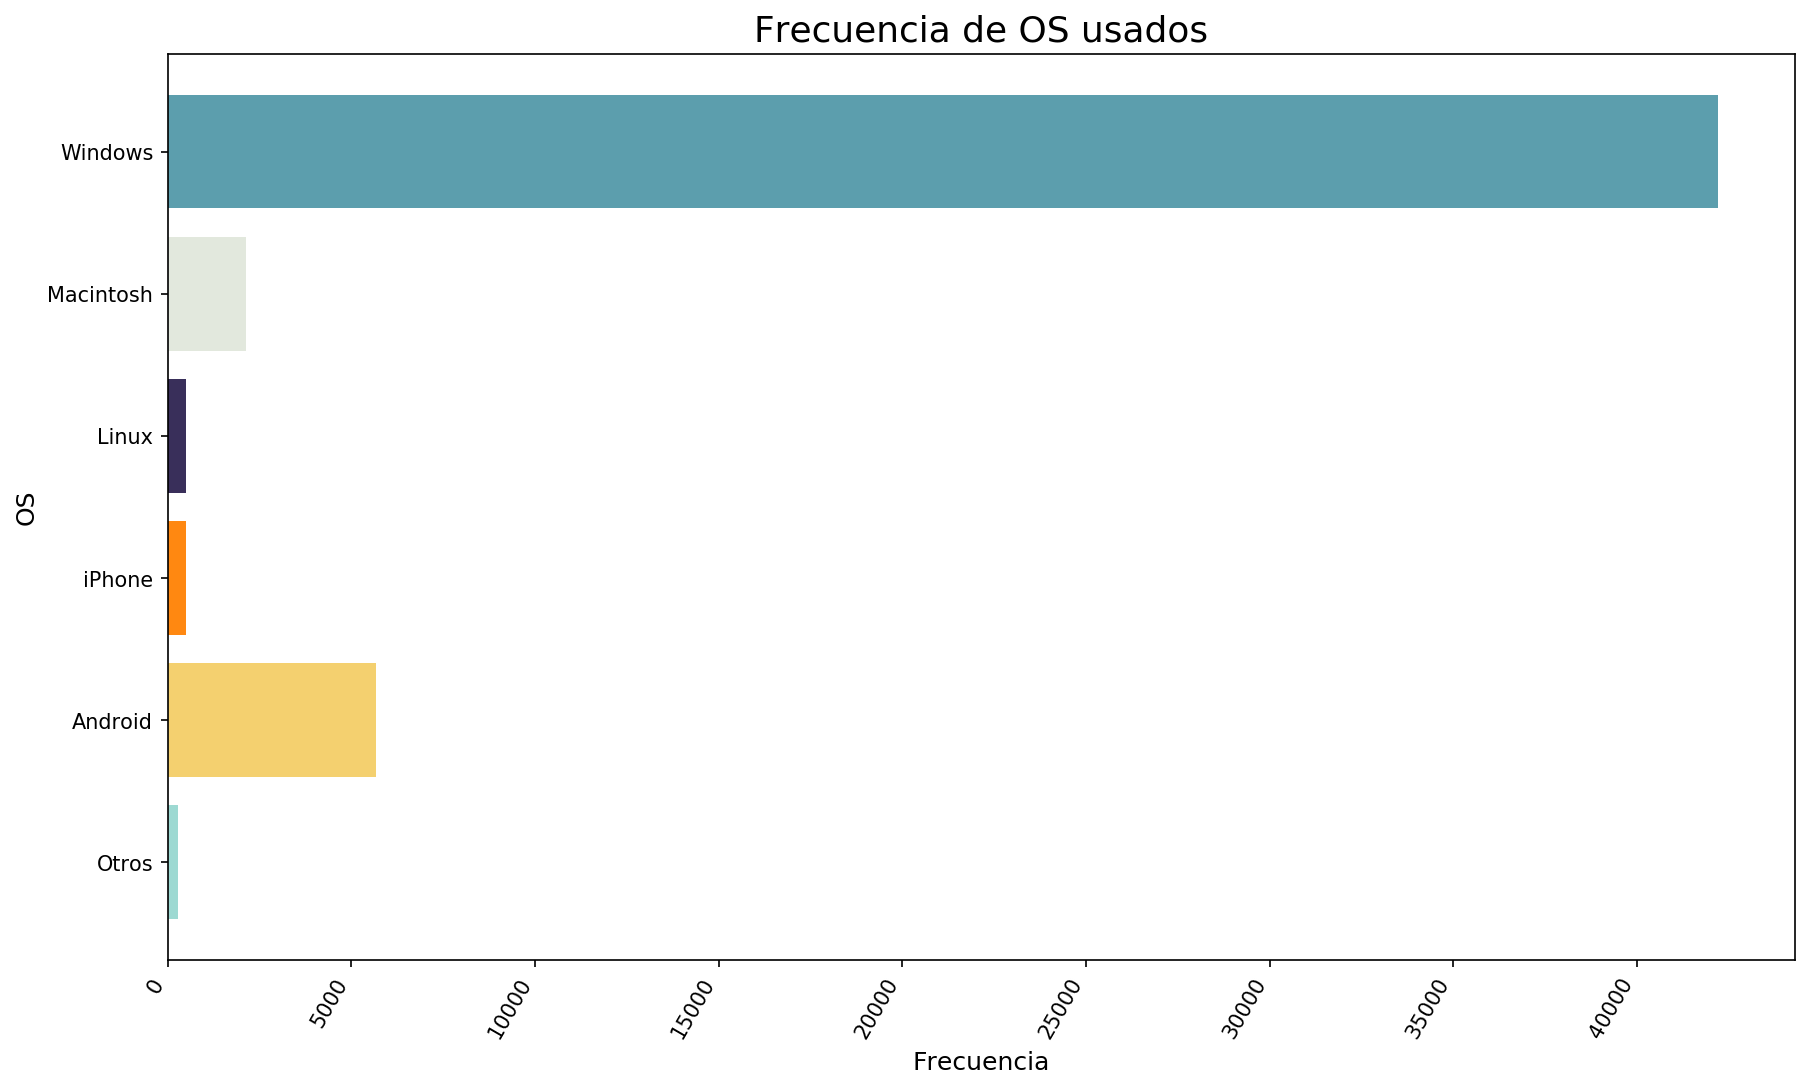

In [12]:
plt.figure(figsize=(14,8), dpi=150)

plt.barh(otherData[0], otherData[1], color=colors2[2]) # Dibujamos un grafico de barras con los valores de agent y frequency (otherData)
plt.barh(phoneData['agent'].values, phoneData['frequency'].values, color=colors2[0:2]) # Dibujamos un grafico de barras con los valores de agent y frequency (phoneData)
plt.barh(computerData['agent'].values, computerData['frequency'].values, color=colors2[3:]) # Dibujamos un grafico de barras con los valores agent y frequency (computerData)

plt.title('Frecuencia de OS usados', size='xx-large')
plt.xlabel('Frecuencia', size='large')
plt.ylabel('OS', size='large')
plt.xticks(rotation=60, ha='right')

## Grafico de Pie

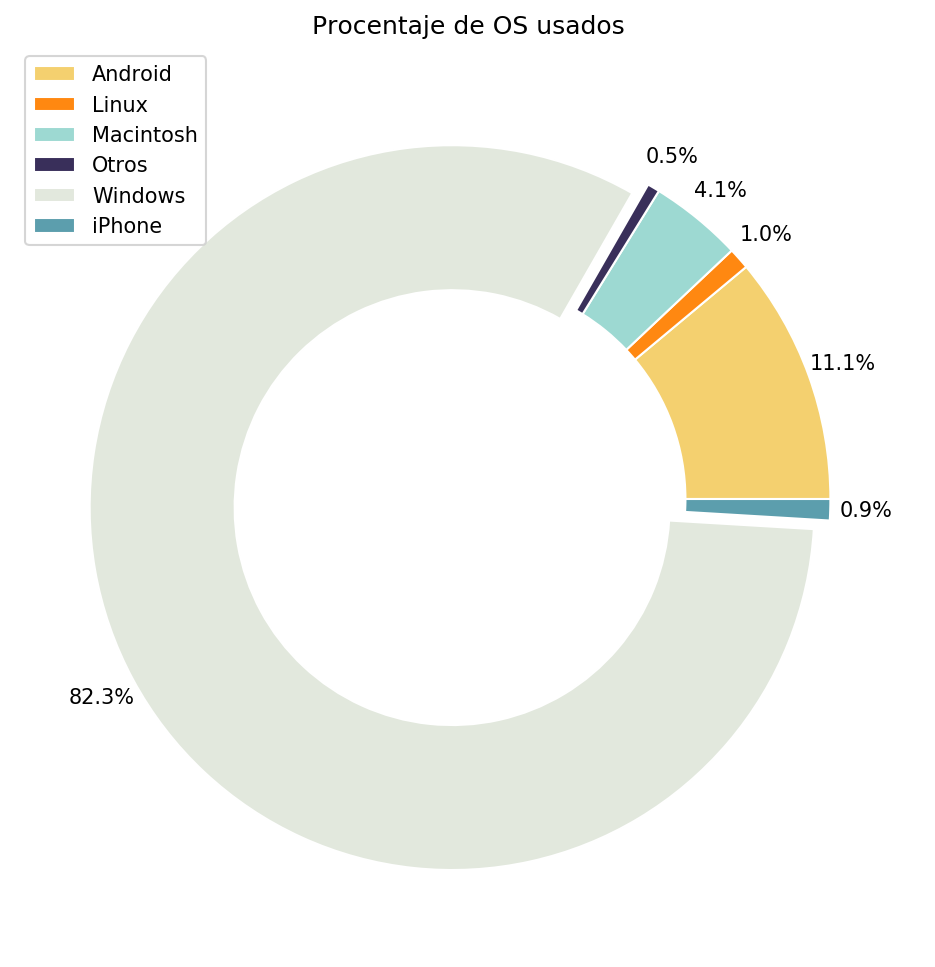

In [13]:
expl =(0, 0, 0, 0, 0.05, 0) # Se define que el segmento de Windows estara separado de los demas
plt.figure(figsize=(14,8), dpi=150)
plt.pie(deviceData['frequency'], explode=expl, autopct='%1.1f%%', pctdistance=1.1, colors=colors2, rotatelabels=True, wedgeprops=dict(width=0.4, edgecolor='w')) # Creamos el grafico de Pie
plt.title("Procentaje de OS usados")
plt.legend(deviceData['agent']) # Creamos una Leyenda ara el grafico